In [1]:
%cd ..

/home/nevin/projects/HSLU.Time/lecture_exercises


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
from pathlib import Path
from tqdm.autonotebook import tqdm
import missingno as msno
from itertools import cycle
from sklearn.metrics import mean_absolute_error
from IPython.display import display, HTML
# %load_ext autoreload
# %autoreload 2
np.random.seed()
tqdm.pandas()

/tmp/ipykernel_30451/1707045337.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
os.makedirs("imgs/chapter_2", exist_ok=True)
preprocessed = Path("data/london_smart_meters/preprocessed")

In [4]:
assert preprocessed.is_dir(), "You have to run 02 - Preprocessing London Smart Meter Dataset.ipynb in Chapter02 before running this notebook"

In [5]:
def format_plot(fig, legends = None, font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=900,
            height=500,
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': title_font_size}
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text="Value",
                title_font=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text="Day",
                title_font=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig

# Reading Blocks 0-7

In [6]:
from src.utils.data_utils import compact_to_expanded

In [7]:
try:
    block_df = pd.read_parquet(preprocessed/"london_smart_meters_merged_block_0-7.parquet")
    display(block_df.head())
except FileNotFoundError:
    display(HTML("""
    <div class="alert alert-block alert-warning">
    <b>Warning!</b> File not found. Please make sure you have run 02 - Preprocessing London Smart Meter Dataset.ipynb in Chapter02
    </div>
    """))

,LCLid,start_timestamp,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-13,30min,"[0.263, 0.2689999999999999, 0.275, 0.256, 0.21...",24144,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[186, 186, 188, 188, 190, 190, 203, 203, 206, ...","[8.78, 8.78, 8.27, 8.27, 7.87, 7.87, 7.89, 7.8...","[6.28, 6.28, 6.21, 6.21, 6.22, 6.22, 6.76, 6.7...","[1007.7, 1007.7, 1007.36, 1007.36, 1006.73, 10...","[7.55, 7.55, 7.34, 7.34, 6.75, 6.75, 6.89, 6.8...","[2.28, 2.28, 1.81, 1.81, 1.95, 1.95, 1.83, 1.8...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.84, 0.84, 0.87, 0.87, 0.89, 0.89, 0.93, 0.9...","[Clear, Clear, Clear, Clear, Partly Cloudy, Pa..."
1,MAC000246,2012-01-01,30min,"[0.509, 0.317, 0.253, 0.249, 0.93, 0.607, 0.10...",37872,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[229, 229, 238, 238, 229, 229, 231, 231, 227, ...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[10.97, 10.97, 11.02, 11.02, 11.04, 11.04, 10....","[1008.1, 1008.1, 1007.88, 1007.88, 1007.95, 10...","[12.12, 12.12, 12.59, 12.59, 12.45, 12.45, 12....","[5.9, 5.9, 6.06, 6.06, 5.31, 5.31, 4.68, 4.68,...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, clo...","[0.93, 0.93, 0.9, 0.9, 0.91, 0.91, 0.93, 0.93,...","[Mostly Cloudy, Mostly Cloudy, Overcast, Overc..."
2,MAC000450,2012-03-23,30min,"[1.337, 1.426, 0.996, 0.971, 0.994, 0.952, 0.8...",33936,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[78, 78, 73, 73, 81, 81, 80, 80, 75, 75, 71, 7...","[8.76, 8.76, 8.54, 8.54, 8.09, 8.09, 7.34, 7.3...","[7.25, 7.25, 7.12, 7.12, 7.17, 7.17, 6.68, 6.6...","[1027.41, 1027.41, 1026.91, 1026.91, 1026.54, ...","[7.59, 7.59, 7.43, 7.43, 7.24, 7.24, 7.34, 7.3...","[2.18, 2.18, 2.07, 2.07, 1.72, 1.72, 1.34, 1.3...","[rain, rain, rain, rain, rain, rain, rain, rai...","[fog, fog, fog, fog, fog, fog, fog, fog, fog, ...","[0.9, 0.9, 0.91, 0.91, 0.94, 0.94, 0.96, 0.96,...","[Foggy, Foggy, Foggy, Foggy, Foggy, Foggy, Fog..."
3,MAC001074,2012-05-09,30min,"[0.18, 0.086, 0.106, 0.173, 0.146, 0.223, 0.21...",31680,ToU,ACORN-,ACORN-,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[215, 215, 207, 207, 215, 215, 216, 216, 126, ...","[11.46, 11.46, 11.38, 11.38, 11.38, 11.38, 10....","[10.23, 10.23, 10.17, 10.17, 10.24, 10.24, 10....","[1007.39, 1007.39, 1007.21, 1007.21, 1007.06, ...","[11.46, 11.46, 11.38, 11.38, 11.38, 11.38, 10....","[2.35, 2.35, 2.15, 2.15, 1.84, 1.84, 1.22, 1.2...","[rain, rain, rain, rain, rain, rain, rain, rai...","[partly-cloudy-night, partly-cloudy-night, par...","[0.92, 0.92, 0.92, 0.92, 0.93, 0.93, 0.95, 0.9...","[Partly Cloudy, Partly Cloudy, Mostly Cloudy, ..."
4,MAC003223,2012-09-18,30min,"[0.076, 0.079, 0.123, 0.109, 0.051, 0.069, 0.0...",25344,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[236, 236, 240, 240, 242, 242, 244, 244, 248, ...","[14.06, 14.06, 13.12, 13.12, 12.53, 12.53, 12....","[10.82, 10.82, 10.29, 10.29, 9.86, 9.86, 9.83,...","[1011.09, 1011.09, 1010.82, 1010.82, 1010.65, ...","[14.06, 14.06, 13.12, 13.12, 12.53, 12.53, 12....","[3.86, 3.86, 3.81, 3.81, 4.27, 4.27, 4.12, 4.1...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.81, 0.81, 0.83, 0.83, 0.84, 0.84, 0.86, 0.8...","[Clear, Clear, Clear, Clear, Clear, Clear, Par..."


Let's take all the consumers in one block for our exercise. Keep in mind, you can do the same with more number of blocks as long as it fits in your RAM

In [8]:
#Converting to expanded form
exp_block_df = compact_to_expanded(block_df[block_df.file=="block_7"], timeseries_col = 'energy_consumption',
static_cols = ["frequency", "series_length", "stdorToU", "Acorn", "Acorn_grouped", "file"],
time_varying_cols = ['holidays', 'visibility', 'windBearing', 'temperature', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon',
       'humidity', 'summary'],
ts_identifier = "LCLid")

exp_block_df.head()

100%|██████████| 50/50 [00:00<00:00, 135.22it/s]



,timestamp,LCLid,energy_consumption,frequency,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,2012-01-01 00:00:00,MAC000050,0.175,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
1,2012-01-01 00:30:00,MAC000050,0.212,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
2,2012-01-01 01:00:00,MAC000050,0.313,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
3,2012-01-01 01:30:00,MAC000050,0.302,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
4,2012-01-01 02:00:00,MAC000050,0.257,30min,37872,Std,ACORN-D,Affluent,block_7,NO_HOLIDAY,...,229,12.45,11.04,1007.95,12.45,5.31,rain,partly-cloudy-night,0.91,Mostly Cloudy


# Missing Data and Advanced Imputation Techniques

/home/nevin/miniconda3/envs/time/lib/python3.11/site-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/home/nevin/miniconda3/envs/time/lib/python3.11/site-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


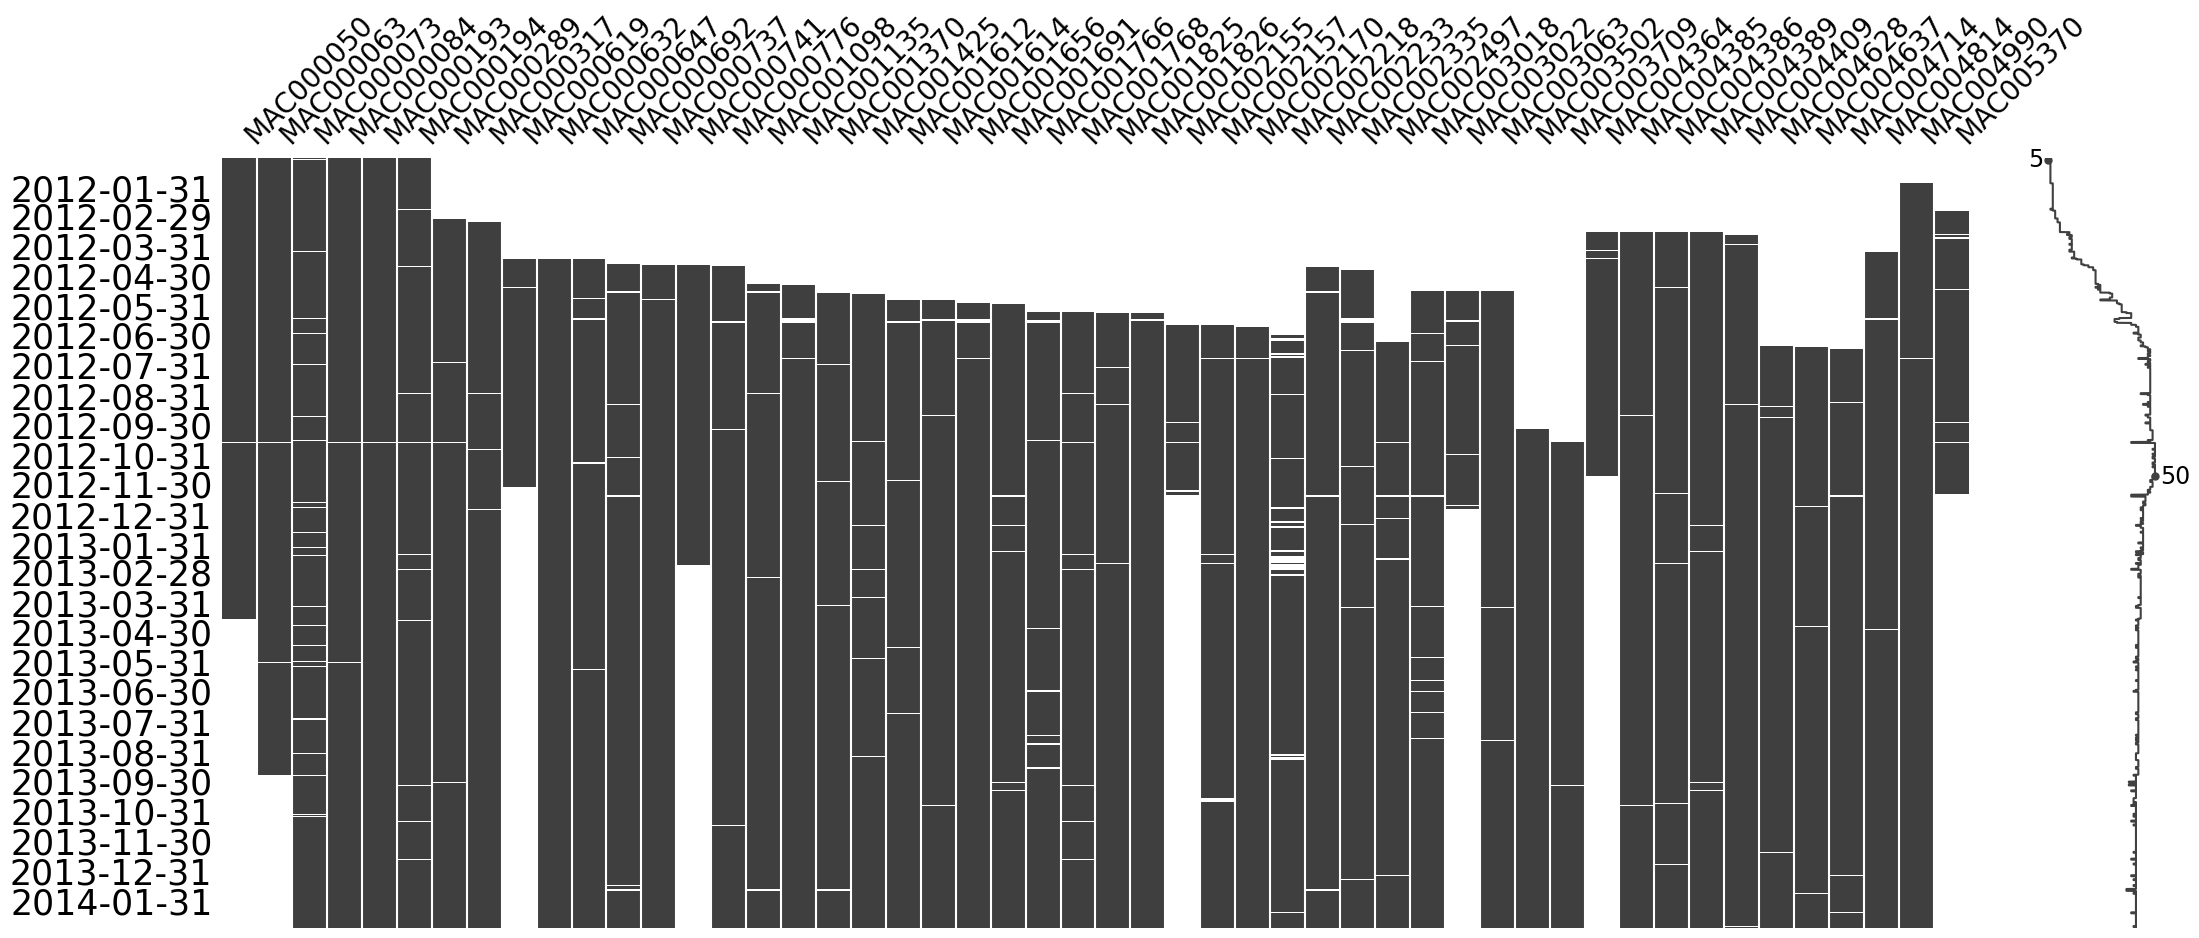

In [9]:
# Pivot the data to set the index as the datetime and the different time series along the columns
plot_df = pd.pivot_table(exp_block_df, index="timestamp", columns="LCLid", values="energy_consumption")
# Generate Plot. Since we have a datetime index, we can mention the frequency to decide what do we want on the X axis
msno.matrix(plot_df, freq="M", fontsize=20)
plt.savefig('imgs/chapter_2/missing_no_full.png', bbox_inches='tight')
plt.show()

In [10]:
# Taking a single time series from the block
ts_df = exp_block_df[exp_block_df.LCLid=="MAC000193"].set_index("timestamp")

We know that there is some missing data between 2012-09-30 and 2012-10-31. But instead of picking a window where there is an actual missing data, let's pick a window where data is present, but we artificially remove it and then look at techniques to fill it. This way, we can have some way to see how well a particular method is working.

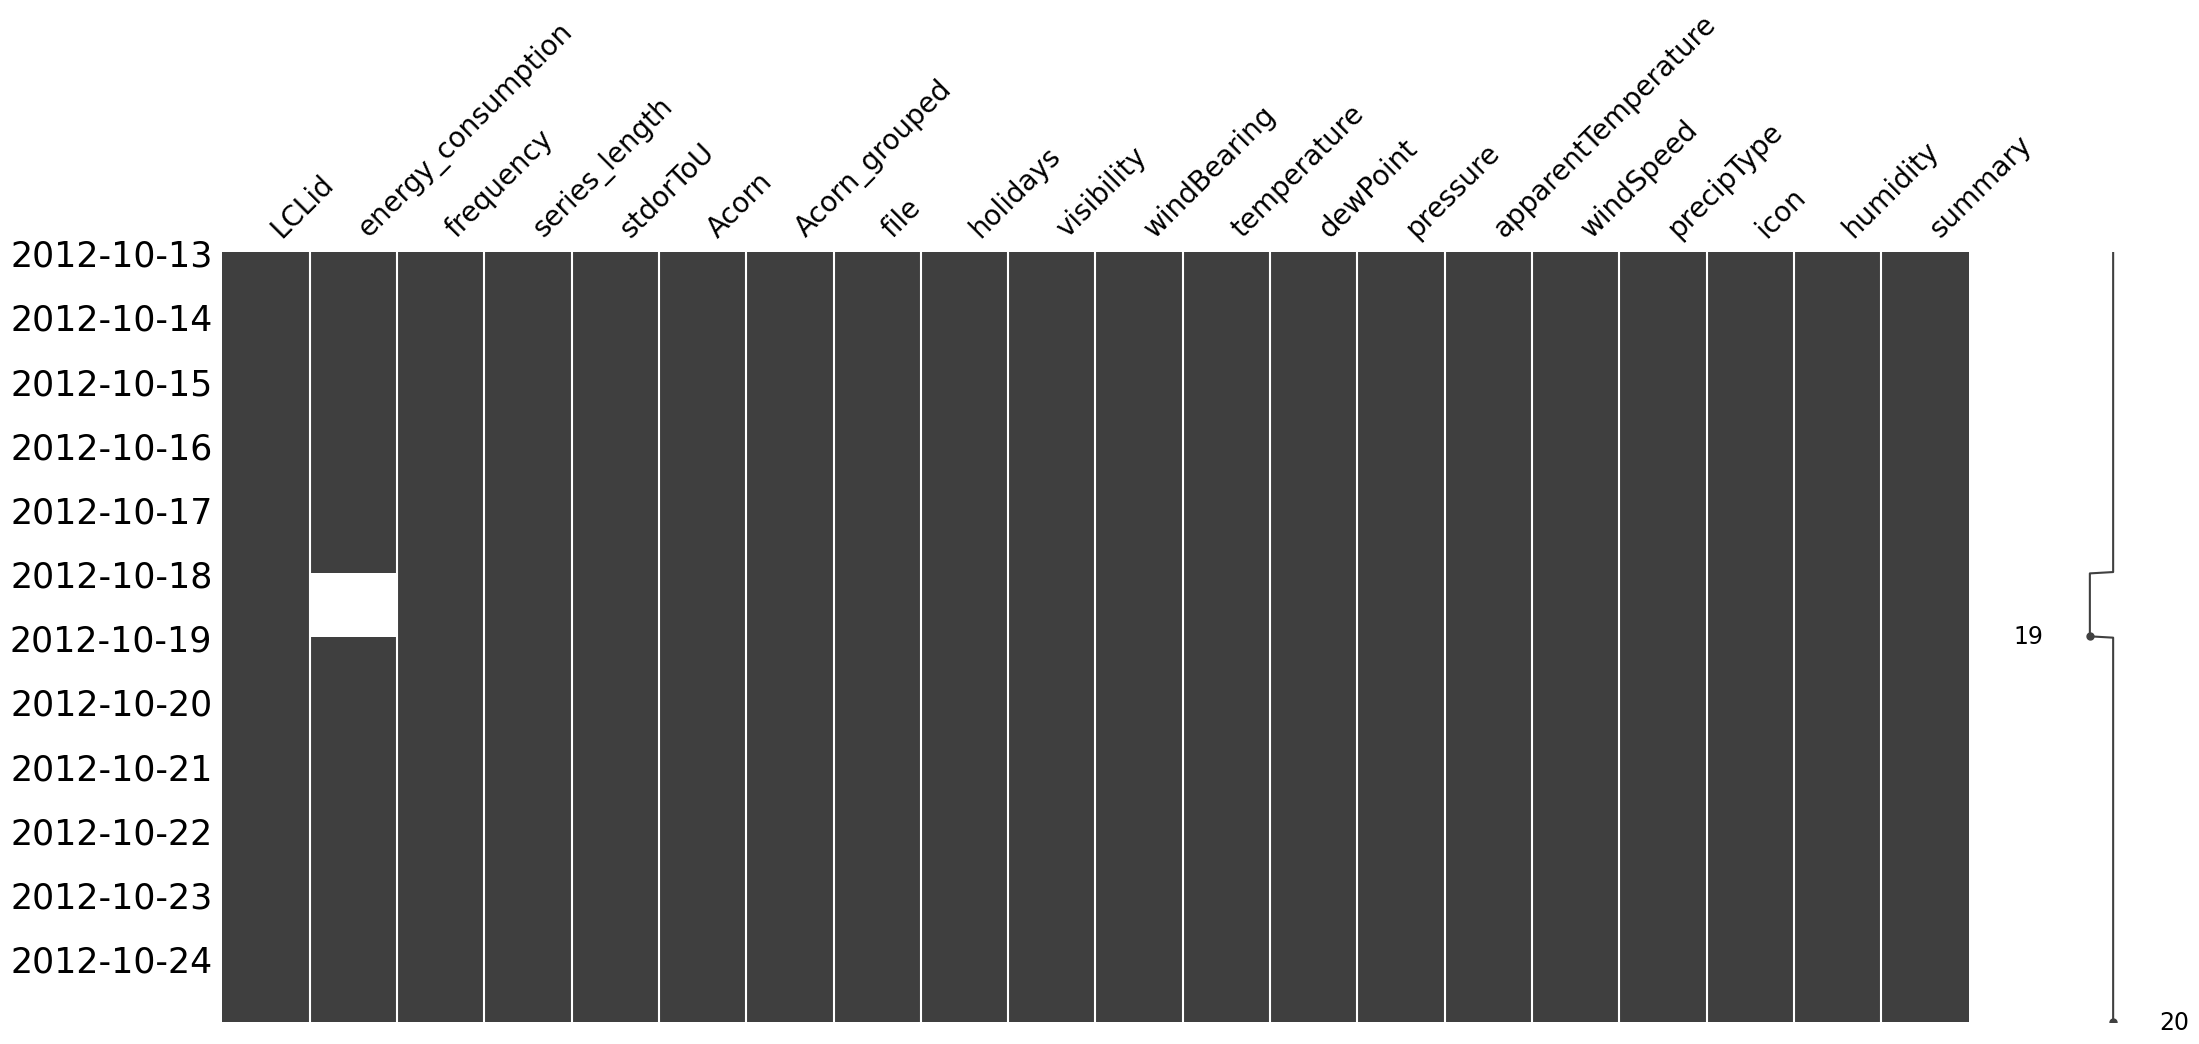

In [11]:
msno.matrix(ts_df["2012-10-13": "2012-10-24"], freq="D", fontsize=20)
plt.savefig('imgs/chapter_2/missing_no_mac000193.png', bbox_inches='tight')
plt.show()

We see that there are two days of information and normally would preceed to fill in the gaps using some of the techniques we will be revieweing. But just to see how effective the different techniques we are reviewing, we will artificially create a missing section and see how well we are able to impute it.

In [ ]:
window = slice("2012-10-07", "2012-10-08")
ts_df['energy_consumption_missing'] = ts_df.energy_consumption
ts_df.loc[window, "energy_consumption_missing"] = np.nan
vis_window = slice(pd.to_datetime(window.start) - pd.Timedelta(days=2), pd.to_datetime(window.stop) + pd.Timedelta(days=2))

In [13]:
fig = px.line(ts_df[vis_window], y="energy_consumption_missing", title=f"MAC000193 Energy Consumption between {vis_window.start.strftime('%Y-%m-%d')} and {vis_window.stop.strftime('%Y-%m-%d')}")
fig = format_plot(fig)
fig.write_image("imgs/chapter_2/mac000193_missing.png")
fig.show()

## Missing Data Imputation

In [14]:
null_mask = ts_df.energy_consumption_missing.isnull()

### Repeating Patterns

#### Last Day

In [ ]:
ts_df["prev_day"] = ts_df['energy_consumption'].shift(48)
ts_df['prev_day_imputed'] =  ts_df['energy_consumption_missing']
ts_df.loc[null_mask,"prev_day_imputed"] = ts_df.loc[null_mask,"prev_day"]
mae = mean_absolute_error(ts_df.loc[window, "prev_day_imputed"], ts_df.loc[window, "energy_consumption"])

In [16]:
plot_df = pd.melt(ts_df.loc[window,['energy_consumption','prev_day_imputed']].reset_index(), id_vars='timestamp', var_name="series")
fig = px.line(plot_df, x="timestamp", y=["value"], line_dash="series", title=f"Imputing with Previous Day | MAE={mae:.3f}")
fig = format_plot(fig, ['Original', 'Previous Day Imputed'])
fig.write_image("imgs/chapter_2/previous_day_imputation.png")
fig

#### Hourly Profile

In [ ]:
ts_df["hour"] = ts_df.index.hour

hourly_profile = ts_df.groupby(['hour'])['energy_consumption'].mean().reset_index()
hourly_profile.rename(columns={"energy_consumption": "hourly_profile"}, inplace=True)

idx = ts_df.index

ts_df = ts_df.merge(hourly_profile, on=['hour'], how='left', validate="many_to_one")
ts_df.index = idx

ts_df['hourly_profile_imputed'] = ts_df['energy_consumption_missing']
ts_df.loc[null_mask,"hourly_profile_imputed"] = ts_df.loc[null_mask,"hourly_profile"]
mae = mean_absolute_error(ts_df.loc[window, "hourly_profile_imputed"], ts_df.loc[window, "energy_consumption"])

In [18]:
plot_df = pd.melt(ts_df.loc[window,['energy_consumption','hourly_profile_imputed']].reset_index(), id_vars='timestamp', var_name="series")
fig = px.line(plot_df, x="timestamp", y=["value"], line_dash="series", title=f"Imputing with Hourly Profile | MAE={mae:.3f}")
fig = format_plot(fig, ['Original', 'Hourly Profile Imputed'])
fig.write_image("imgs/chapter_2/hourly_profile_imputation.png")
fig

#### Weekday-Hourly Profile

In [ ]:
ts_df["weekday"] = ts_df.index.weekday
day_hourly_profile = ts_df.groupby(['weekday','hour'])['energy_consumption'].mean().reset_index()
day_hourly_profile.rename(columns={"energy_consumption": "day_hourly_profile"}, inplace=True)

idx = ts_df.index

ts_df = ts_df.merge(day_hourly_profile, on=['weekday', 'hour'], how='left', validate="many_to_one")
ts_df.index = idx

ts_df['day_hourly_profile_imputed'] = ts_df['energy_consumption_missing']
ts_df.loc[null_mask,"day_hourly_profile_imputed"] = ts_df.loc[null_mask,"day_hourly_profile"]
mae = mean_absolute_error(ts_df.loc[window, "day_hourly_profile_imputed"], ts_df.loc[window, "energy_consumption"])

In [20]:
plot_df = pd.melt(ts_df.loc[window,['energy_consumption','day_hourly_profile_imputed']].reset_index(), id_vars='timestamp', var_name="series")
fig = px.line(plot_df, x="timestamp", y=["value"], line_dash="series", title=f"Imputing with Week Day-Hourly Profile | MAE={mae:.3f}")
fig = format_plot(fig, ['Original', 'Week Day-Hourly Profile Imputed'])
fig.write_image("imgs/chapter_2/day_hourly_profile_imputation.png")
fig

In [ ]:
px.line(ts_df.loc["2012-10-15": "2012-10-21",['day_hourly_profile','weekday']].reset_index(), x="timestamp", y="day_hourly_profile", color='weekday', title="Hourly Profiles by Weekday (0-Monday - 6-Sunday)")

#### Seasonal Interpolation

In [22]:
from src.imputation.interpolation import SeasonalInterpolation

In [ ]:
recovered_matrix_seas_interp_weekday_half_hour = SeasonalInterpolation(seasonal_period=48*7,
                                                     decomposition_strategy="additive", 
                                                     interpolation_strategy="spline", 
                                                     interpolation_args={"order":3}, 
                                                     min_value=0).fit_transform(ts_df.energy_consumption_missing.values.reshape(-1,1))

ts_df['seas_interp_weekday_half_hour_imputed'] = recovered_matrix_seas_interp_weekday_half_hour
mae_weekday_half_hour = mean_absolute_error(ts_df.loc[window, "seas_interp_weekday_half_hour_imputed"], ts_df.loc[window, "energy_consumption"])

In [24]:
recovered_matrix_seas_interp_half_hour = SeasonalInterpolation(seasonal_period=48,
                                                     decomposition_strategy="additive", 
                                                     interpolation_strategy="spline", 
                                                     interpolation_args={"order":3}, 
                                                     min_value=0).fit_transform(ts_df.energy_consumption_missing.values.reshape(-1,1))

ts_df['seas_interp_half_hour_imputed'] = recovered_matrix_seas_interp_half_hour
mae_half_hour = mean_absolute_error(ts_df.loc[window, "seas_interp_half_hour_imputed"], ts_df.loc[window, "energy_consumption"])

In [25]:
plot_df = pd.melt(ts_df.loc[window,['energy_consumption', "seas_interp_half_hour_imputed", 'seas_interp_weekday_half_hour_imputed']].reset_index(), id_vars='timestamp', var_name="series")
fig = px.line(plot_df, x="timestamp", y=["value"], line_dash="series", title=f"Imputing with Seasonal Interpolation <br> MAE Half Hourly={mae_half_hour:.3f} | MAE Weekday-Half Hourly={mae_weekday_half_hour:.3f}")
fig = format_plot(fig, ['Original', 'Half Hourly Profile Imputed', 'Week Day-Half Hourly Profile Imputed'], title_font_size=16)
fig.write_image("imgs/chapter_2/seasonal_interpolation_imputation.png")
fig

### Summary

In [26]:
imputed_columns = [col for col in ts_df.columns if "imputed" in col]
original_col = "energy_consumption"

In [27]:
act = ts_df.loc[window, original_col].values
mae_d = {}
for col in imputed_columns:
    mae_d[col] = mean_absolute_error(act, ts_df.loc[window, col].values)

In [28]:
mae_d.keys()

dict_keys(['prev_day_imputed', 'hourly_profile_imputed', 'day_hourly_profile_imputed', 'seas_interp_weekday_half_hour_imputed', 'seas_interp_half_hour_imputed'])

In [29]:
res_df = pd.DataFrame.from_dict(mae_d, orient="index").reset_index()
res_df.columns=["Imputation", "MAE"]
res_df.Imputation = res_df.Imputation.map({
 'prev_day_imputed': "Previous Day",
 'hourly_profile_imputed': "Hourly Profile",
 'day_hourly_profile_imputed': "Day-Hourly Profile",
 'seas_interp_weekday_half_hour_imputed': "Seasonal Interpolation Weekday-Half Hourly",
 'seas_interp_half_hour_imputed': "Seasonal Interpolation Half Hourly"
})

In [30]:
res_df

,Imputation,MAE
0,Previous Day,0.167896
1,Hourly Profile,0.121326
2,Day-Hourly Profile,0.116652
3,Seasonal Interpolation Weekday-Half Hourly,0.120024
4,Seasonal Interpolation Half Hourly,0.121568


In [31]:
px.line(ts_df.loc[window, imputed_columns+[original_col]].reset_index(), x="timestamp", y=imputed_columns+[original_col])

# Time Series Analysis: ACF and Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

## Autocorrelation Function (ACF) Analysis

The ACF shows how correlated the time series is with its past values at different lags. This helps us understand:
- **Daily patterns**: High correlation at 48 lags (24 hours * 2 half-hour periods)
- **Weekly patterns**: High correlation at 336 lags (7 days * 48 half-hours)
- **Seasonality**: Regular patterns that repeat over time

In [ ]:
analysis_period = slice("2012-10-01", "2012-10-31")
ts_clean = ts_df.loc[analysis_period, 'energy_consumption'].dropna()

print(f"Analyzing period: {analysis_period.start} to {analysis_period.stop}")
print(f"Data points: {len(ts_clean):,}")
print(f"Missing values: {ts_df.loc[analysis_period, 'energy_consumption'].isnull().sum()}")

print(f"\nBasic Statistics:")
print(f"Mean: {ts_clean.mean():.3f} kWh")
print(f"Std: {ts_clean.std():.3f} kWh")
print(f"Min: {ts_clean.min():.3f} kWh")
print(f"Max: {ts_clean.max():.3f} kWh")

Analyzing period: 2012-10-01 to 2012-10-31
Data points: 1,440
Missing values: 48

Basic Statistics:
Mean: 0.284 kWh
Std: 0.370 kWh
Min: 0.003 kWh
Max: 2.696 kWh


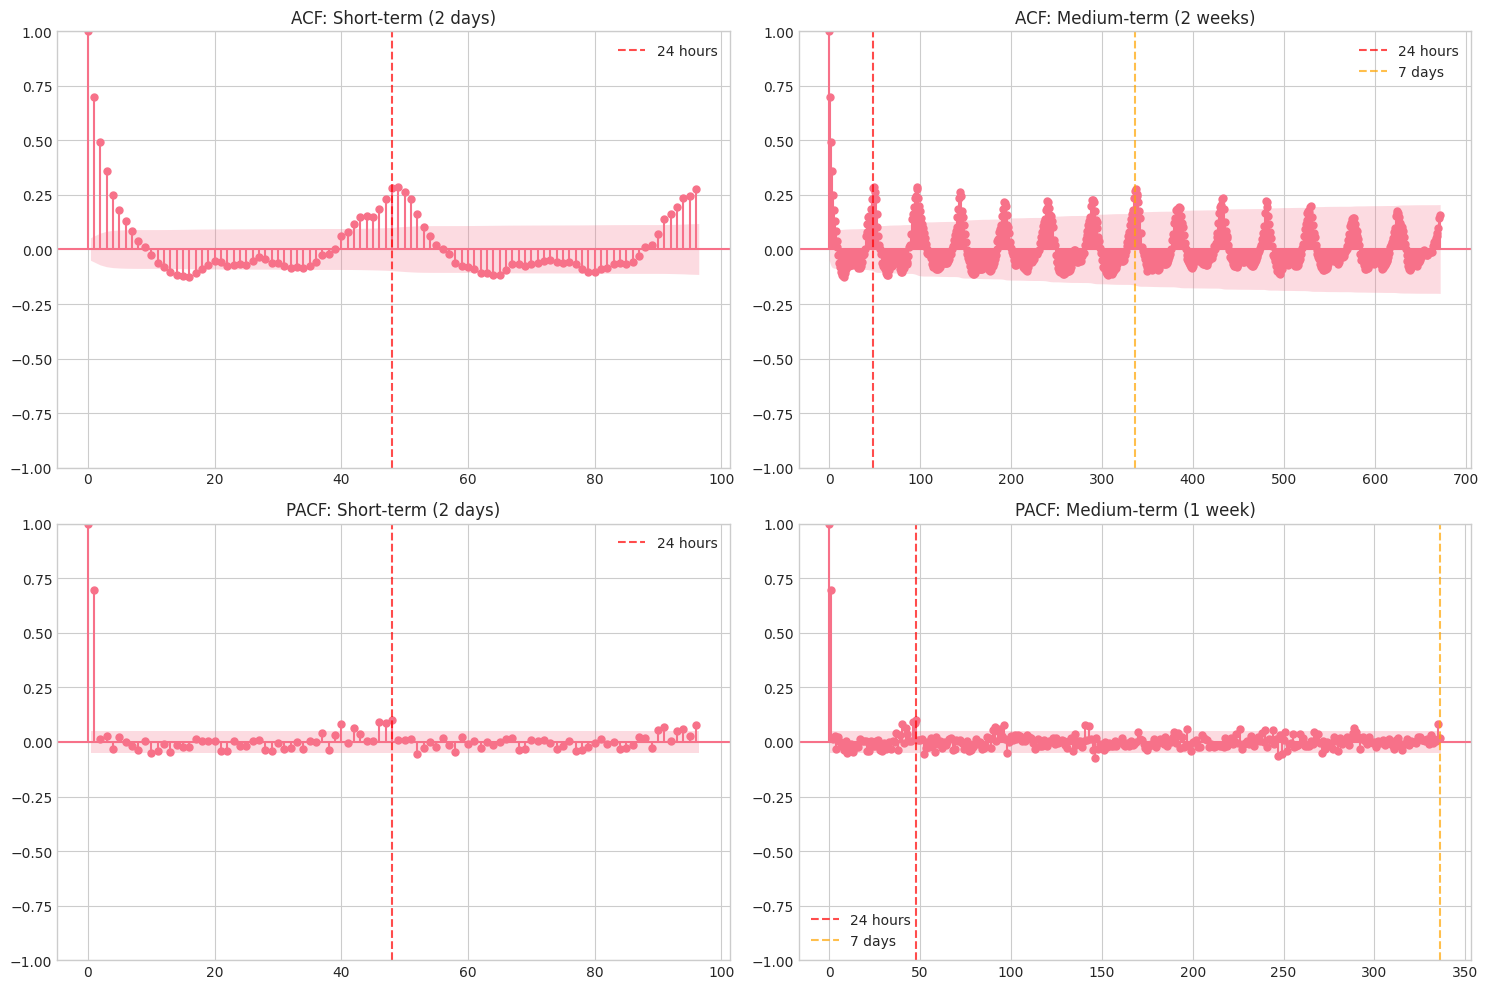

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plot_acf(ts_clean, lags=96, ax=axes[0,0], title='ACF: Short-term (2 days)')
axes[0,0].axvline(x=48, color='red', linestyle='--', alpha=0.7, label='24 hours')
axes[0,0].legend()

plot_acf(ts_clean, lags=672, ax=axes[0,1], title='ACF: Medium-term (2 weeks)')
axes[0,1].axvline(x=48, color='red', linestyle='--', alpha=0.7, label='24 hours')
axes[0,1].axvline(x=336, color='orange', linestyle='--', alpha=0.7, label='7 days')
axes[0,1].legend()

plot_pacf(ts_clean, lags=96, ax=axes[1,0], title='PACF: Short-term (2 days)')
axes[1,0].axvline(x=48, color='red', linestyle='--', alpha=0.7, label='24 hours')
axes[1,0].legend()

plot_pacf(ts_clean, lags=336, ax=axes[1,1], title='PACF: Medium-term (1 week)')
axes[1,1].axvline(x=48, color='red', linestyle='--', alpha=0.7, label='24 hours')
axes[1,1].axvline(x=336, color='orange', linestyle='--', alpha=0.7, label='7 days')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('imgs/chapter_2/acf_pacf_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def create_interactive_acf(series, max_lags=336, title="Interactive ACF"):
    """Create an interactive ACF plot using Plotly"""
    acf_values = acf(series, nlags=max_lags, fft=True)
    lags = np.arange(len(acf_values))
    
    fig = px.line(x=lags, y=acf_values, 
                  title=f"{title} - Hover for details",
                  labels={'x': 'Lag (half-hours)', 'y': 'Autocorrelation'})
    
    n = len(series)
    significance = 1.96 / np.sqrt(n)
    fig.add_hline(y=significance, line_dash="dash", line_color="red", 
                  annotation_text="95% significance")
    fig.add_hline(y=-significance, line_dash="dash", line_color="red")

    fig.add_vline(x=48, line_dash="dot", line_color="orange", 
                  annotation_text="24 hours")
    fig.add_vline(x=336, line_dash="dot", line_color="purple", 
                  annotation_text="7 days")

    fig.update_layout(
        width=900, 
        height=500,
        showlegend=False,
        hovermode='x unified'
    )
    
    return fig

interactive_acf_fig = create_interactive_acf(ts_clean, max_lags=672, 
                                           title="Interactive ACF: Energy Consumption")
interactive_acf_fig.show()

## Time Series Decomposition

Decomposition separates the time series into its fundamental components:
- **Trend**: Long-term direction or movement
- **Seasonal**: Regular patterns that repeat over fixed periods
- **Residual/Noise**: Random variation after removing trend and seasonality

We'll use both additive and multiplicative decomposition methods.

In [ ]:
decomposition_additive = seasonal_decompose(ts_clean, 
                                          model='additive', 
                                          period=48,
                                          extrapolate_trend='freq')

decomposition_multiplicative = seasonal_decompose(ts_clean, 
                                                model='multiplicative', 
                                                period=48,
                                                extrapolate_trend='freq')

print("Decomposition completed for both additive and multiplicative models")

Decomposition completed for both additive and multiplicative models


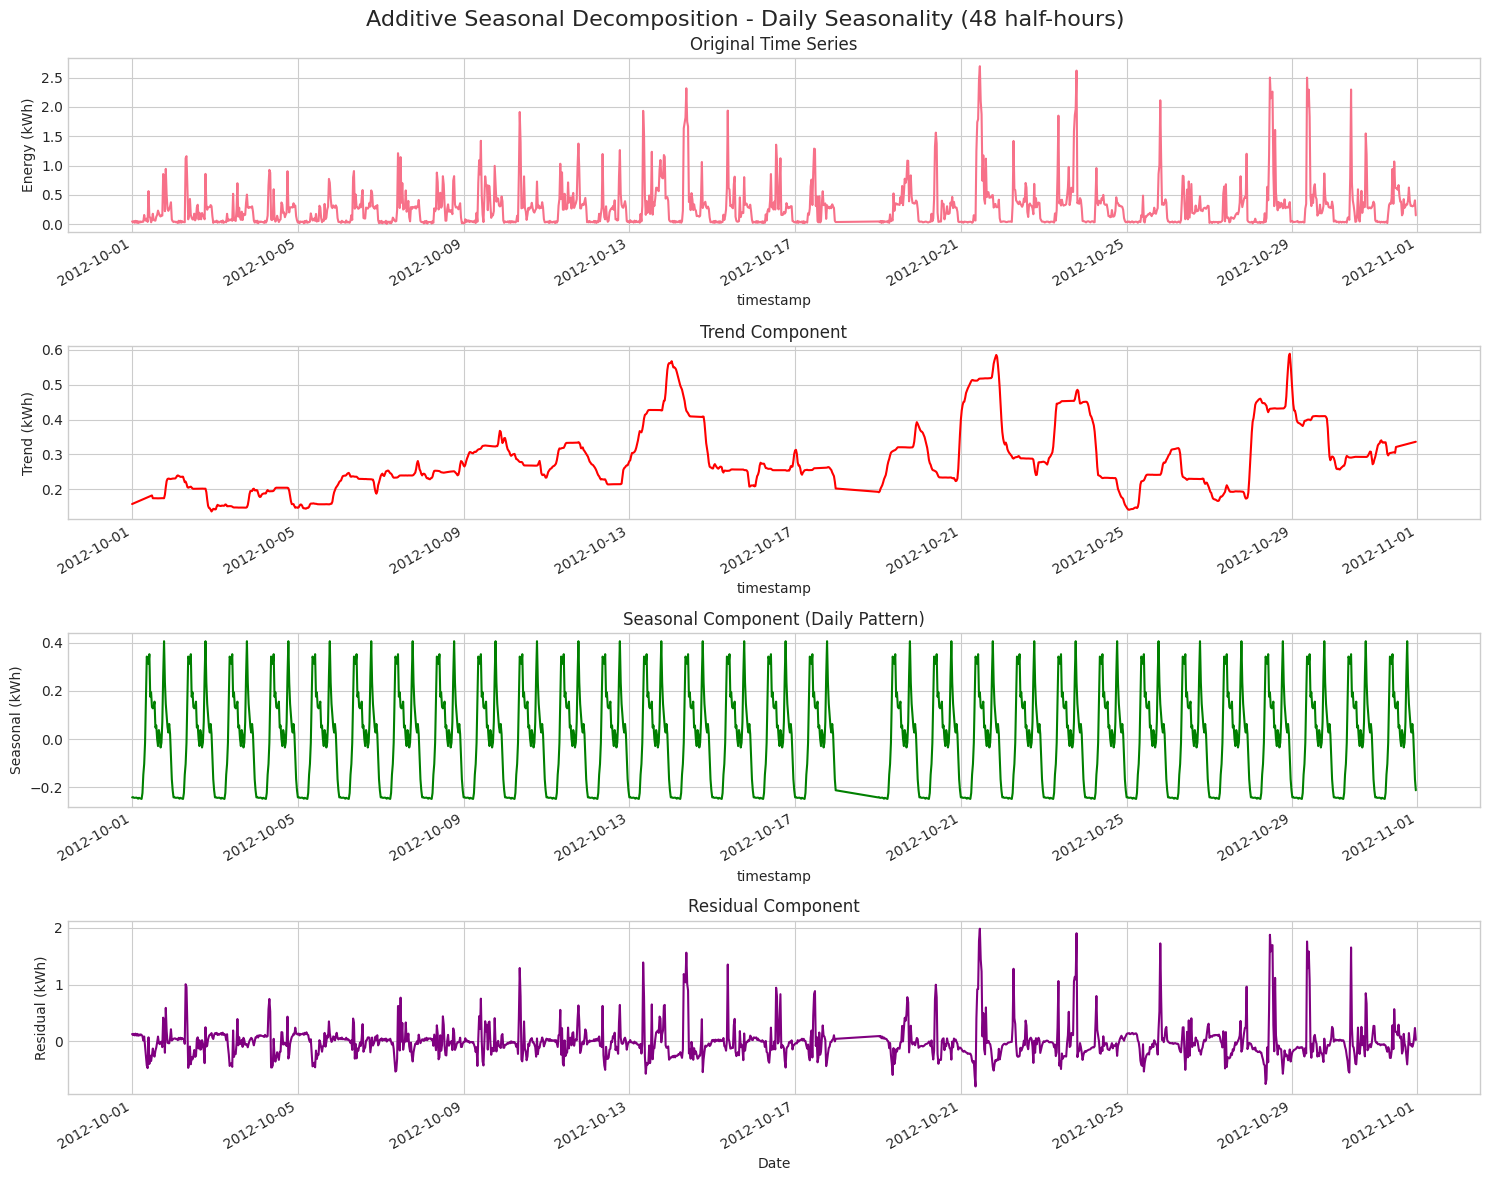

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

decomposition_additive.observed.plot(ax=axes[0], title='Original Time Series')
axes[0].set_ylabel('Energy (kWh)')

decomposition_additive.trend.plot(ax=axes[1], title='Trend Component', color='red')
axes[1].set_ylabel('Trend (kWh)')

decomposition_additive.seasonal.plot(ax=axes[2], title='Seasonal Component (Daily Pattern)', color='green')
axes[2].set_ylabel('Seasonal (kWh)')

decomposition_additive.resid.plot(ax=axes[3], title='Residual Component', color='purple')
axes[3].set_ylabel('Residual (kWh)')
axes[3].set_xlabel('Date')

plt.suptitle('Additive Seasonal Decomposition - Daily Seasonality (48 half-hours)', 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('imgs/chapter_2/additive_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def create_interactive_decomposition(decomposition, title_prefix="Decomposition"):
    """Create interactive decomposition plots using Plotly subplots"""
    from plotly.subplots import make_subplots

    fig = make_subplots(
        rows=4, cols=1,
        subplot_titles=[
            f'{title_prefix}: Original', 
            f'{title_prefix}: Trend', 
            f'{title_prefix}: Seasonal',
            f'{title_prefix}: Residual'
        ],
        vertical_spacing=0.08
    )

    fig.add_trace(px.line(x=decomposition.observed.index, 
                         y=decomposition.observed.values).data[0], 
                 row=1, col=1)
    
    fig.add_trace(px.line(x=decomposition.trend.index, 
                         y=decomposition.trend.values).data[0], 
                 row=2, col=1)
    
    fig.add_trace(px.line(x=decomposition.seasonal.index, 
                         y=decomposition.seasonal.values).data[0], 
                 row=3, col=1)
    
    fig.add_trace(px.line(x=decomposition.resid.index, 
                         y=decomposition.resid.values).data[0], 
                 row=4, col=1)

    fig.update_layout(
        height=800,
        showlegend=False,
        title_text=f"{title_prefix} - Interactive View"
    )

    fig.update_yaxes(title_text="Energy (kWh)", row=1, col=1)
    fig.update_yaxes(title_text="Trend (kWh)", row=2, col=1)
    fig.update_yaxes(title_text="Seasonal (kWh)", row=3, col=1)
    fig.update_yaxes(title_text="Residual (kWh)", row=4, col=1)
    fig.update_xaxes(title_text="Date", row=4, col=1)
    
    return fig

interactive_additive = create_interactive_decomposition(
    decomposition_additive, "Additive Decomposition"
)
interactive_additive.show()

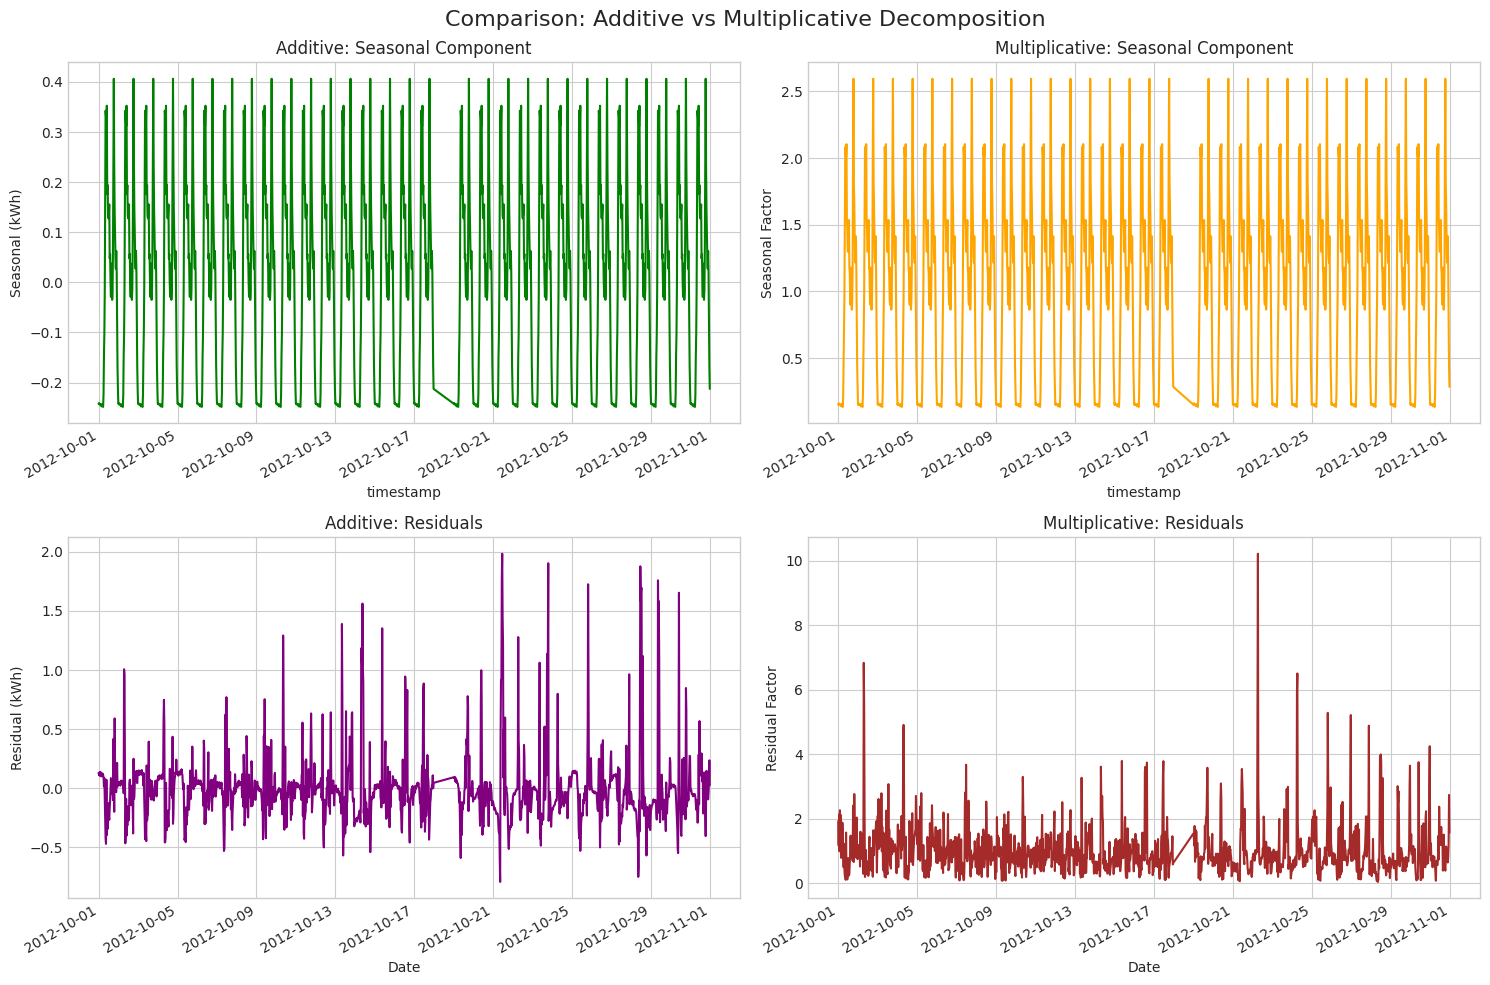

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

decomposition_additive.seasonal.plot(ax=axes[0,0], 
                                    title='Additive: Seasonal Component', 
                                    color='green')
axes[0,0].set_ylabel('Seasonal (kWh)')

decomposition_multiplicative.seasonal.plot(ax=axes[0,1], 
                                          title='Multiplicative: Seasonal Component', 
                                          color='orange')
axes[0,1].set_ylabel('Seasonal Factor')

decomposition_additive.resid.plot(ax=axes[1,0], 
                                 title='Additive: Residuals', 
                                 color='purple')
axes[1,0].set_ylabel('Residual (kWh)')
axes[1,0].set_xlabel('Date')

decomposition_multiplicative.resid.plot(ax=axes[1,1], 
                                       title='Multiplicative: Residuals', 
                                       color='brown')
axes[1,1].set_ylabel('Residual Factor')
axes[1,1].set_xlabel('Date')

plt.suptitle('Comparison: Additive vs Multiplicative Decomposition', fontsize=16)
plt.tight_layout()
plt.savefig('imgs/chapter_2/decomposition_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Analysis of Decomposition Components

Let's analyze what each component tells us about the energy consumption patterns:

/tmp/ipykernel_30451/3421108421.py:6: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



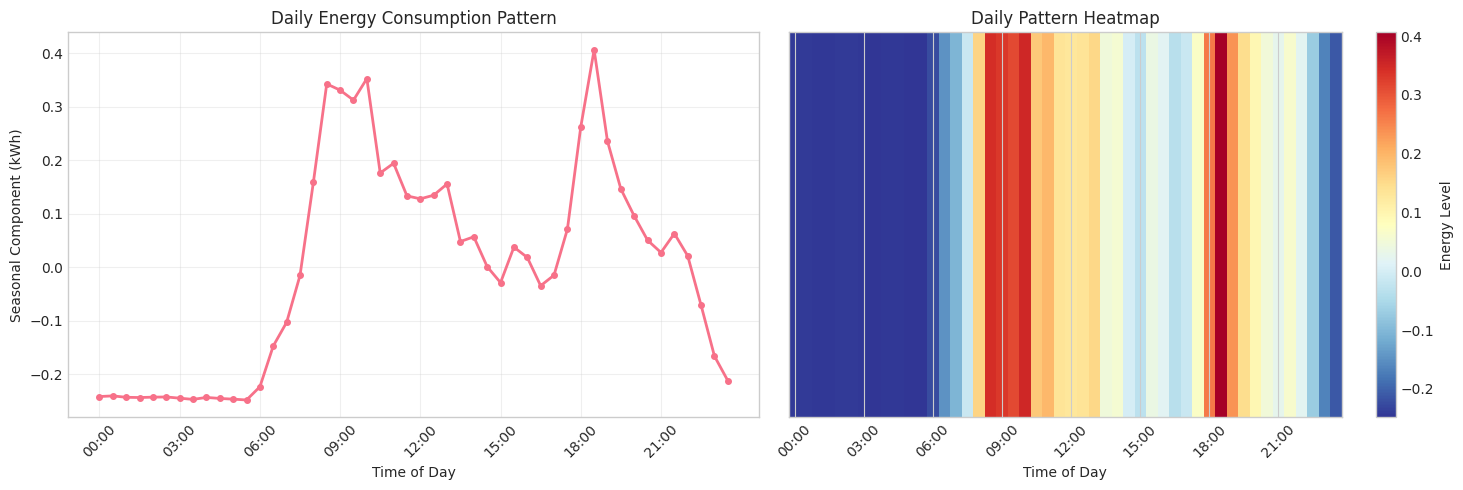

Daily Energy Consumption Insights:
Peak consumption time: 18:30 (seasonal component: 0.406 kWh)
Lowest consumption time: 05:30 (seasonal component: -0.249 kWh)
Daily seasonal range: 0.655 kWh


In [ ]:
daily_seasonal = decomposition_additive.seasonal[:48]
time_labels = pd.date_range('00:00', periods=48, freq='30T').strftime('%H:%M')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(48), daily_seasonal.values, marker='o', linewidth=2, markersize=4)
ax1.set_title('Daily Energy Consumption Pattern')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Seasonal Component (kWh)')
ax1.set_xticks(range(0, 48, 6))
ax1.set_xticklabels([time_labels[i] for i in range(0, 48, 6)], rotation=45)
ax1.grid(True, alpha=0.3)

daily_matrix = daily_seasonal.values.reshape(1, -1)
im = ax2.imshow(daily_matrix, aspect='auto', cmap='RdYlBu_r')
ax2.set_title('Daily Pattern Heatmap')
ax2.set_xlabel('Time of Day') 
ax2.set_xticks(range(0, 48, 6))
ax2.set_xticklabels([time_labels[i] for i in range(0, 48, 6)], rotation=45)
ax2.set_yticks([])
plt.colorbar(im, ax=ax2, label='Energy Level')

plt.tight_layout()
plt.savefig('imgs/chapter_2/daily_pattern_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

peak_time_idx = np.argmax(daily_seasonal.values)
low_time_idx = np.argmin(daily_seasonal.values)

print(f"Daily Energy Consumption Insights:")
print(f"Peak consumption time: {time_labels[peak_time_idx]} (seasonal component: {daily_seasonal.iloc[peak_time_idx]:.3f} kWh)")
print(f"Lowest consumption time: {time_labels[low_time_idx]} (seasonal component: {daily_seasonal.iloc[low_time_idx]:.3f} kWh)")
print(f"Daily seasonal range: {daily_seasonal.max() - daily_seasonal.min():.3f} kWh")

In [ ]:
components_stats = {
    'Component': ['Original', 'Trend', 'Seasonal', 'Residual (Additive)', 'Residual (Multiplicative)'],
    'Mean': [
        decomposition_additive.observed.mean(),
        decomposition_additive.trend.mean(),
        decomposition_additive.seasonal.mean(),
        decomposition_additive.resid.mean(),
        decomposition_multiplicative.resid.mean()
    ],
    'Std Dev': [
        decomposition_additive.observed.std(),
        decomposition_additive.trend.std(),
        decomposition_additive.seasonal.std(),
        decomposition_additive.resid.std(),
        decomposition_multiplicative.resid.std()
    ],
    'Variance': [
        decomposition_additive.observed.var(),
        decomposition_additive.trend.var(),
        decomposition_additive.seasonal.var(),
        decomposition_additive.resid.var(),
        decomposition_multiplicative.resid.var()
    ]
}

stats_df = pd.DataFrame(components_stats)
print("Decomposition Components Statistics:")
print("="*50)
display(stats_df.round(4))

total_variance = decomposition_additive.observed.var()
trend_var_explained = (decomposition_additive.trend.var() / total_variance) * 100
seasonal_var_explained = (decomposition_additive.seasonal.var() / total_variance) * 100
residual_var_remaining = (decomposition_additive.resid.var() / total_variance) * 100

print(f"\nVariance Explained by Components (Additive Model):")
print(f"Trend: {trend_var_explained:.1f}%")
print(f"Seasonal: {seasonal_var_explained:.1f}%") 
print(f"Residual: {residual_var_remaining:.1f}%")
print(f"Total: {trend_var_explained + seasonal_var_explained + residual_var_remaining:.1f}%")

Decomposition Components Statistics:


,Component,Mean,Std Dev,Variance
0,Original,0.2835,0.3705,0.1372
1,Trend,0.2839,0.0953,0.0091
2,Seasonal,0.0000,0.1958,0.0383
3,Residual (Additive),-0.0004,0.3005,0.0903
4,Residual (Multiplicative),0.9982,0.7971,0.6354



Variance Explained by Components (Additive Model):
Trend: 6.6%
Seasonal: 27.9%
Residual: 65.8%
Total: 100.3%


### Using Decomposition to Improve Imputation

Now let's see how understanding the time series structure can improve our imputation methods. We'll create an improved imputation method that uses the decomposed components.

In [ ]:
def decomposition_imputation(series_with_missing, period=48, model='additive'):
    """
    Impute missing values using time series decomposition
    
    Parameters:
    series_with_missing: pandas Series with missing values
    period: seasonal period (default 48 for daily seasonality)
    model: 'additive' or 'multiplicative'
    
    Returns:
    imputed_series: Series with missing values filled
    """
    imputed = series_with_missing.copy()

    if model == 'additive':
        decomp = decomposition_additive
    else:
        decomp = decomposition_multiplicative

    missing_mask = imputed.isnull()

    for idx in imputed[missing_mask].index:
        if idx in decomp.trend.index and idx in decomp.seasonal.index:
            trend_val = decomp.trend.loc[idx]
            seasonal_val = decomp.seasonal.loc[idx]
            
            if model == 'additive':
                imputed_val = trend_val + seasonal_val
            else:
                imputed_val = trend_val * seasonal_val

            if pd.isna(trend_val):
                trend_series = decomp.trend.dropna()
                if len(trend_series) > 0:
                    nearest_idx = trend_series.index[np.argmin(np.abs(trend_series.index - idx))]
                    trend_val = trend_series.loc[nearest_idx]
                    
                    if model == 'additive':
                        imputed_val = trend_val + seasonal_val
                    else:
                        imputed_val = trend_val * seasonal_val
            
            imputed.loc[idx] = imputed_val
    
    return imputed

ts_decomp_imputed = decomposition_imputation(ts_df['energy_consumption_missing'])
mae_decomp = mean_absolute_error(ts_df.loc[window, "energy_consumption"], 
                                ts_decomp_imputed.loc[window])

print(f"Decomposition-based imputation MAE: {mae_decomp:.3f}")

ts_df['decomposition_imputed'] = ts_decomp_imputed

Decomposition-based imputation MAE: 0.124


In [ ]:
imputed_columns_extended = [col for col in ts_df.columns if "imputed" in col]
original_col = "energy_consumption"

act = ts_df.loc[window, original_col].values
mae_d_extended = {}
for col in imputed_columns_extended:
    mae_d_extended[col] = mean_absolute_error(act, ts_df.loc[window, col].values)

res_df_extended = pd.DataFrame.from_dict(mae_d_extended, orient="index").reset_index()
res_df_extended.columns = ["Imputation", "MAE"]
res_df_extended.Imputation = res_df_extended.Imputation.map({
    'prev_day_imputed': "Previous Day",
    'hourly_profile_imputed': "Hourly Profile", 
    'day_hourly_profile_imputed': "Day-Hourly Profile",
    'seas_interp_weekday_half_hour_imputed': "Seasonal Interpolation Weekday-Half Hourly",
    'seas_interp_half_hour_imputed': "Seasonal Interpolation Half Hourly",
    'decomposition_imputed': "Decomposition-Based (Trend + Seasonal)"
})

res_df_extended = res_df_extended.sort_values('MAE')

print("Extended Imputation Methods Comparison:")
print("="*50)
display(res_df_extended)

fig = px.bar(res_df_extended, 
             x='MAE', 
             y='Imputation',
             orientation='h',
             title='Imputation Methods Performance Comparison (Lower MAE = Better)',
             labels={'MAE': 'Mean Absolute Error (kWh)', 'Imputation': 'Method'})

fig.update_layout(height=400, yaxis={'categoryorder': 'total ascending'})
fig.show()

Extended Imputation Methods Comparison:


,Imputation,MAE
2,Day-Hourly Profile,0.116652
3,Seasonal Interpolation Weekday-Half Hourly,0.120024
1,Hourly Profile,0.121326
4,Seasonal Interpolation Half Hourly,0.121568
5,Decomposition-Based (Trend + Seasonal),0.123872
0,Previous Day,0.167896
